# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [3]:
# TODO
# Insert your code HERE

# Create a contingency table

observed = pd.DataFrame({
    'Clicks': [clicks_a, clicks_b],
    'No Clicks': [visitors_a - clicks_a, visitors_b - clicks_b]
}, index=('A', 'B')
)
observed

,Clicks,No Clicks
A,150,850
B,180,870


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [4]:
# Null Hypothesis (H₀): `#TODO`.

# Null Hypothesis (H₀):
# Version B’s CTR is not different from Version A’s CTR.
# (The observed difference is due to random chance.)

# Alternative Hypothesis `#TODO`.

# Alternative Hypothesis (H₁):
# Version B’s CTR is higher than Version A’s CTR.
# (The difference is statistically significant.)


- Run the Test

In [5]:
# TODO
# Insert your code HERE

chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"\nChi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)



Chi-square statistic: 1.59
P-value: 0.2079
Degrees of freedom: 1
Expected frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]


> Interpret Results

In [6]:
# TODO
# Insert your code HERE

print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


P-value: 0.2079
Fail to reject the null hypothesis.


In [7]:
ctr_a = clicks_a / visitors_a  # 150/1000 = 0.15 (15%)
ctr_b = clicks_b / visitors_b  # 180/1050 ≈ 0.1714 (17.14%)

📈 Visualization

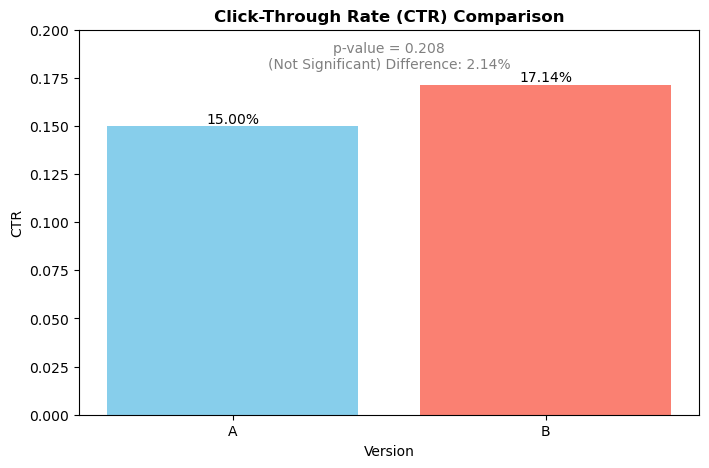

In [8]:
# Set up the plot
plt.figure(figsize=(8, 5))
versions = ['A', 'B']
ctrs = [ctr_a, ctr_b]

# Create bars
bars = plt.bar(versions, ctrs, color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Click-Through Rate (CTR) Comparison', fontweight='bold')
plt.xlabel('Version')
plt.ylabel('CTR')
plt.ylim(0, 0.2)  # Adjust y-axis to show 0-20% CTR

# Add CTR values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2%}',  # Format as percentage
             ha='center', va='bottom')

# Add p-value annotation
plt.text(0.5, 0.18, f'p-value = {p_value:.3f}\n(Not Significant) Difference: {(ctr_b - ctr_a)*100:.2f}%', 
         ha='center', fontsize=10, color='gray')

plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [9]:
# pip install kagglehub

In [10]:
### Import Libraries

import kagglehub

# Download latest version
path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")

print("Path to dataset files:", path)

Path to dataset files: /Users/guillermo/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1


In [11]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [12]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [13]:
# Check group sizes
print(data['test group'].value_counts())

# Calculate conversion rates
conversion_rates = data.groupby('test group')['converted'].mean()
print(conversion_rates)

test group
ad     564577
psa     23524
Name: count, dtype: int64
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [14]:
# TODO
# Insert your code HERE

# Create a contingency table of test group vs converted
cont_table = pd.crosstab(index=data['test group'], columns=data['converted'])
cont_table

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


> Statistical Test

In [15]:
# TODO
# Insert your code HERE
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cont_table)

print(f"\nChi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 54.01
P-value: 1.9989623063390075e-13
Degrees of freedom: 1
Expected frequencies:
[[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [16]:
# TODO
# Insert your code HERE

def bootstrap_conversion(data, group_name, n_resamples=1000):
    # Filter data for the group (e.g., 'ad' or 'psa')
    group_data = data[data['test group'] == group_name]['converted']
    
    resampled_rates = []
    for _ in range(n_resamples):
        # Resample WITH REPLACEMENT (same size as original group)
        resample = np.random.choice(group_data, size=len(group_data), replace=True)
        # Calculate conversion rate for this resample
        rate = resample.mean()
        resampled_rates.append(rate)
    return resampled_rates

# Bootstrap Group A ('ad')
ad_rates = bootstrap_conversion(data, 'ad')

# Bootstrap Group B ('psa')
psa_rates = bootstrap_conversion(data, 'psa')

In [17]:
# For Group A
ad_ci = np.percentile(ad_rates, [2.5, 97.5])  # [lower, upper]

# For Group B
psa_ci = np.percentile(psa_rates, [2.5, 97.5])

>Visualize Resultsm

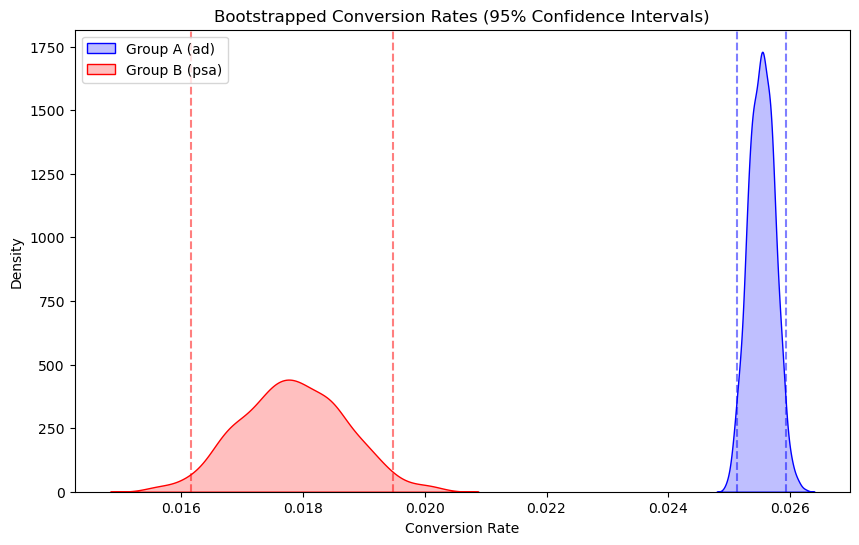

In [18]:
# TODO
# Insert your code HERE

plt.figure(figsize=(10, 6))
sns.kdeplot(ad_rates, label='Group A (ad)', fill=True, color='blue')
sns.kdeplot(psa_rates, label='Group B (psa)', fill=True, color='red')
plt.axvline(ad_ci[0], linestyle='--', color='blue', alpha=0.5)
plt.axvline(ad_ci[1], linestyle='--', color='blue', alpha=0.5)
plt.axvline(psa_ci[0], linestyle='--', color='red', alpha=0.5)
plt.axvline(psa_ci[1], linestyle='--', color='red', alpha=0.5)
plt.title('Bootstrapped Conversion Rates (95% Confidence Intervals)')
plt.xlabel('Conversion Rate')
plt.legend()
plt.show()

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [19]:
# Import Libraries

In [20]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

In [33]:
data #.sort_values('sum_gamerounds', ascending=False)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [47]:
# Check group sizes and retention rates
print("Number of players in each group:")
print(data['version'].value_counts())  # Check group sizes

print("\n1-day retention rates:")
print(data.groupby('version')['retention_1'].mean())  # 1-day retention rates


Number of players in each group:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

1-day retention rates:
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


*Interpretation*:  
- `gate_30`: 44.82% 1-day retention.  
- `gate_40`: 44.23% 1-day retention.  
*Question*: Is this small difference meaningful, or just random noise?  

> Statistical Test

In [59]:
# TODO
# Insert your code HERE
from statsmodels.stats.proportion import proportions_ztest

# Number of users who returned in each group
successes = data.groupby('version')['retention_1'].sum()
display(successes)


version
gate_30    20034
gate_40    20119
Name: retention_1, dtype: int64

In [60]:
# Total users in each group
n = data.groupby('version')['retention_1'].count()

n

version
gate_30    44700
gate_40    45489
Name: retention_1, dtype: int64

In [62]:
# Run Z-test
z_stat, p_val = proportions_ztest(count=successes, nobs=n, alternative='two-sided')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: 1.7841
P-value: 0.0744


### **Quick Summary**  

#### **1. Key Results**  
- **P-value = 0.074** → **No strong evidence** that `gate_30` and `gate_40` have different retention rates.  
  - *(The observed 0.6% difference could just be random noise.)*  
- **Z-statistic = 1.78** → The difference is **small and uncertain** (explained below).  

#### **2. Decision**  
- **Do nothing** (keep `gate_30` as default) unless you want to test further.  
- The data *hints* `gate_30` might be better, but it’s **not conclusive**.  

---

### **What is the Z-Statistic?**  
#### **Simple Explanation**  
The **Z-statistic** measures how far apart the two groups’ retention rates are, relative to expected random variation.  

- **Z = 0**: No difference between groups.  
- **Z > 1.96** or **Z < -1.96**: Statistically significant at 95% confidence (p < 0.05).  
- **Your Z = 1.78** → Close to significance, but not enough to trust.  

#### **What It Says Here**  
- The difference between `gate_30` (44.8%) and `gate_40` (44.2%) is **1.78 standard deviations apart**.  
- Since 1.78 < 1.96, the difference **isn’t strong enough** to rule out randomness.  

---

### **How to Remember This Later**  
1. **P-value > 0.05?** → Difference is **not significant**.  
2. **Z-statistic < 1.96?** → Same conclusion (no hard evidence).  
3. **Action**: Stick with `gate_30` unless new data proves otherwise.  

--- 

### **Visual Cheat Sheet**  
| Metric          | Your Value | Threshold | Conclusion                     |  
|-----------------|------------|-----------|--------------------------------|  
| **P-value**     | 0.074      | < 0.05    | Not significant                |  
| **Z-statistic** | 1.78       | > 1.96    | Not significant                |  
| **Retention**   | 44.8% vs. 44.2% | —       | Tiny difference, likely noise  |  


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [65]:
# TODO

# ✅ Step 1: Shuffle the Data
# To simulate real-time arrivals (as if users are coming in over time), we shuffle the rows.
df_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)



In [66]:
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

sample_sizes = range(500, len(df_shuffled)+1, 500)  # from 500 to full size
p_values = []


In [67]:
for size in sample_sizes:
    sample = df_shuffled.iloc[:size]
    
    successes = sample.groupby('version')['retention_1'].sum()
    n = sample.groupby('version')['retention_1'].count()
    
    z_stat, p_val = proportions_ztest(count=successes, nobs=n)
    p_values.append(p_val)

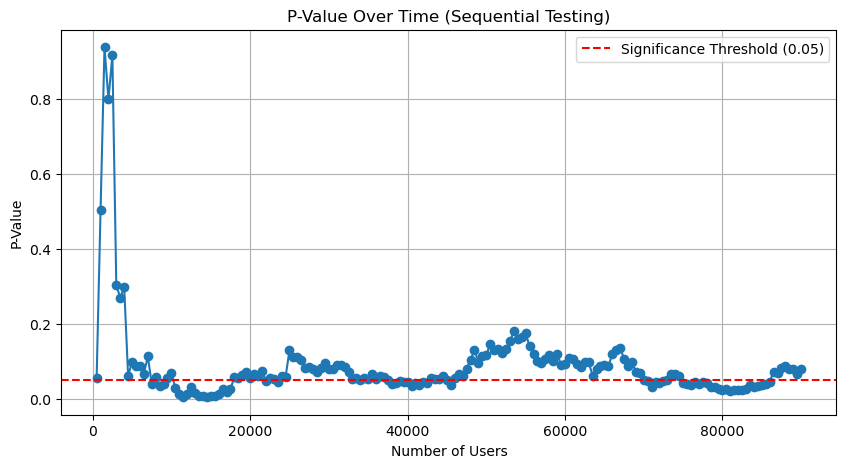

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-Value Over Time (Sequential Testing)')
plt.xlabel('Number of Users')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()


⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [70]:
# TODO
# Insert your code HERE
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize


In [ ]:
# ✅ Step 1: Define the current and target retention rates
# Let’s say the current retention is 0.45, and we want to detect a change to 0.47 (a 2% increase):

# Assumed conversion rates
p1 = 0.45  # current retention (for example)  (e.g., gate_30)
p2 = 0.47  # target retention (2% higher)

# Calculate the effect size
effect_size = proportion_effectsize(p1, p2)  # also called Cohen's h 

In [72]:
# ✅ Step 2: Run the power analysis

# Create power analysis object
analysis = NormalIndPower()

# Calculate sample size per group
sample_size = analysis.solve_power(effect_size=effect_size, power=0.8, alpha=0.05, ratio=1)
print(f"Required sample size per group: {int(sample_size)}")


Required sample size per group: 9746


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_98158/4009895779.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


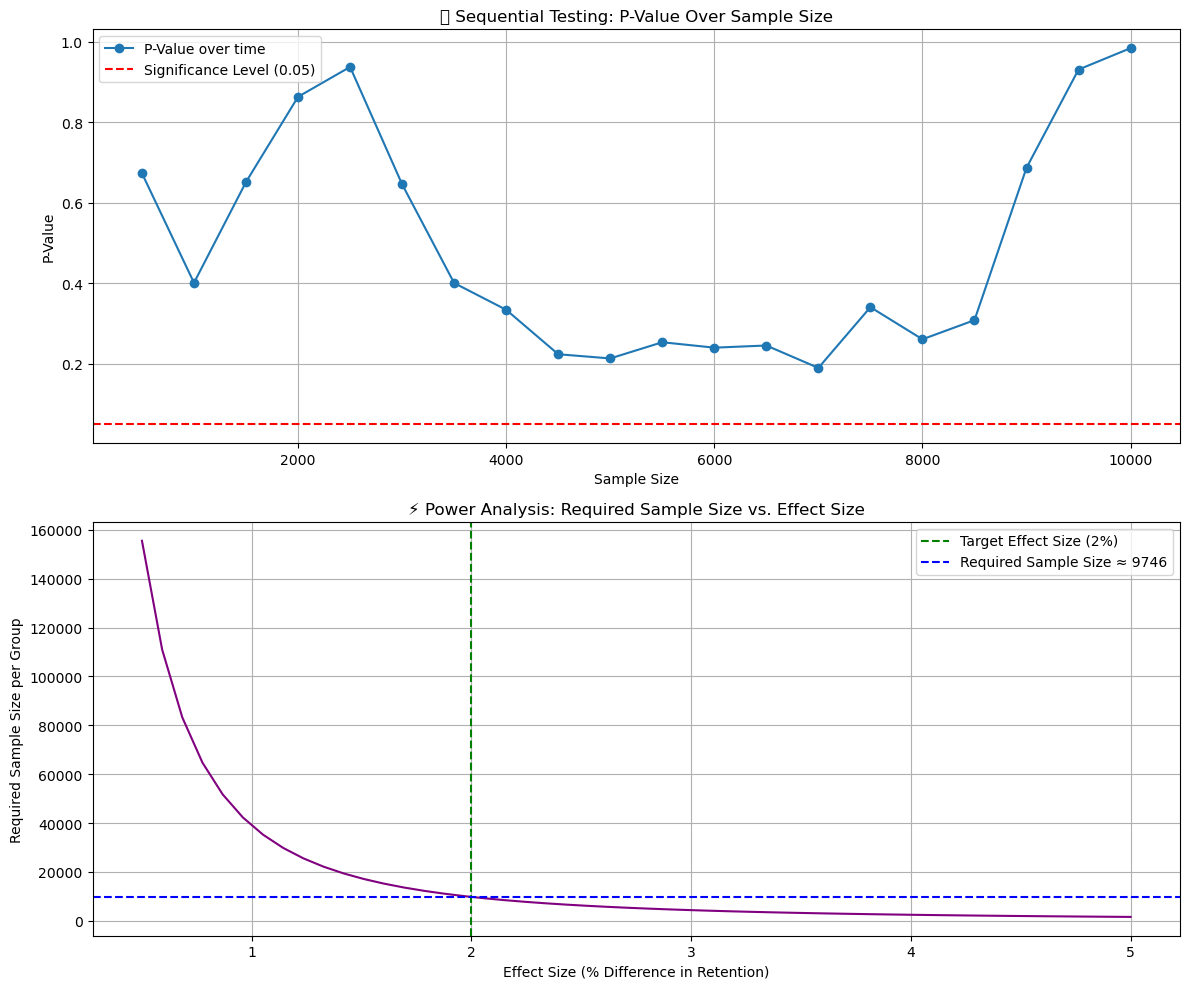

In [77]:
# ✅ Plot Both Charts
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Top Plot: Sequential Testing
axs[0].plot(sample_sizes, p_values, marker='o', label='P-Value over time')
axs[0].axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
axs[0].set_title("📈 Sequential Testing: P-Value Over Sample Size")
axs[0].set_xlabel("Sample Size")
axs[0].set_ylabel("P-Value")
axs[0].legend()
axs[0].grid(True)

# Bottom Plot: Power Analysis
# Generate a range of effect sizes (difference in retention rates)
x_vals = np.linspace(0.005, 0.05, 50)  # 0.5% to 5% effect size
sample_sizes_power = [
	analysis.solve_power(effect_size=proportion_effectsize(p1, p1 + x), power=0.8, alpha=0.05, ratio=1)
	for x in x_vals
]

axs[1].plot(x_vals * 100, sample_sizes_power, color='purple')
axs[1].axvline((p2 - p1) * 100, color='green', linestyle='--', label='Target Effect Size (2%)')
axs[1].axhline(sample_size, color='blue', linestyle='--', label=f'Required Sample Size ≈ {int(sample_size)}')
axs[1].set_title("⚡ Power Analysis: Required Sample Size vs. Effect Size")
axs[1].set_xlabel("Effect Size (% Difference in Retention)")
axs[1].set_ylabel("Required Sample Size per Group")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

#### For 7-day retention rates

In [42]:
print('\n7-day retention rates:', data.groupby('version')['retention_7'].mean())  # 7-day retention rates


7-day retention rates: version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64
